# TAREA DISCO

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u

import healpy as hpy
from astropy_healpix import HEALPix
from astropy.coordinates import Distance
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic
import matplotlib.patches as patches

Ro = 8.2 * u.kpc

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Tarea:
En los mapas de H$\alpha$ y CO de la Vía Láctea encontrar las regiones de que se le presentan en la figura de a continuación:

![finder](finder.png)

## Mapa H$\alpha$

In [2]:
hdulist2 = fits.open('https://lambda.gsfc.nasa.gov/data/foregrounds/fink_halpha/Halpha_fwhm06_1024.fits')

In [3]:
# Establecer la proyeccion HEALPix

nside = hdulist2[1].header['NSIDE']
order = hdulist2[1].header['ORDERING']
hp = HEALPix(nside=nside, order=order, frame=Galactic())

# Establecer una red de 300x200 para lon/lat
lon = np.linspace(-180., 180., 1300) * u.deg
lat = np.linspace(-90., 90., 1000) * u.deg
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Establecer las coordenadas en astropy
from astropy.coordinates import SkyCoord
coords = SkyCoord(lon_grid.ravel(), lat_grid.ravel(), frame='galactic')

# Interpolar valores de temperatura en el archivo fits
temperature = hdulist2[1].data['temperature']
tmap = hp.interpolate_bilinear_lonlat(coords.l, coords.b, temperature)
tmap = tmap.reshape((1000, 1300))

In [4]:
Nombres = np.asarray(['S235', 'S209', 'Cam OB1', 'W5', 'S184', 'S171', 'Cas A', 'Cygnus X', 'Cyg OB1','W49','W44','M17', 'Sco OB1', 'Catarina Nebula', 'Vela', 'S297', 'Mon 0B2', 'Mon 0B1', 'S257', 'Gem 0B1'])
Nombres

array(['S235', 'S209', 'Cam OB1', 'W5', 'S184', 'S171', 'Cas A',
       'Cygnus X', 'Cyg OB1', 'W49', 'W44', 'M17', 'Sco OB1',
       'Catarina Nebula', 'Vela', 'S297', 'Mon 0B2', 'Mon 0B1', 'S257',
       'Gem 0B1'], dtype='<U15')

In [5]:
ID  = np.asarray(['SH2-235', 'SH2-209', 'Cam OB1', 'W5', 'SH2-184', 'SH2-171', 'Cas A', 'Cygnus X','Cyg OB1', 'W49', 'W44','M17','Sco OB1', 'Eta Carina','Vela','SH2-297','Mon OB2','Mon OB1','SH2-257','Gem OB1'])
ID

array(['SH2-235', 'SH2-209', 'Cam OB1', 'W5', 'SH2-184', 'SH2-171',
       'Cas A', 'Cygnus X', 'Cyg OB1', 'W49', 'W44', 'M17', 'Sco OB1',
       'Eta Carina', 'Vela', 'SH2-297', 'Mon OB2', 'Mon OB1', 'SH2-257',
       'Gem OB1'], dtype='<U10')

In [6]:
l = np.asarray([]) 
for name in ID:
    coord_l = SkyCoord.from_name(name).galactic.l.value
    l = np.append(l, coord_l)
    
l

array([173.61975779, 151.60621475, 142.5084733 , 137.221644  ,
       123.06779615, 118.11878533, 111.73475113,  79.50438792,
        75.49716439,  43.20000239,  34.56034006,  15.09520598,
       343.28905012, 287.5967871 , 263.93904395, 225.45510055,
       206.25877765, 202.07993384, 192.57800676, 189.09944254])

In [7]:
b = np.asarray([]) 
for name in ID:
    coord_b = SkyCoord.from_name(name).galactic.b.value
    b = np.append(b, coord_b)
    
b

array([ 2.80998377e+00, -2.39979948e-01,  1.98736308e+00,  9.19553776e-01,
       -6.30648894e+00,  5.02084554e+00, -2.12956763e+00,  1.00059126e+00,
        1.09286197e+00,  1.21847322e-05, -4.96799405e-01, -7.45349903e-01,
        1.20139916e+00, -6.29543463e-01, -3.36828836e+00, -2.58055257e+00,
       -2.10832177e+00,  9.84048323e-01, -8.29906708e-02,  1.04317742e+00])

In [8]:
Data = {'Nombres': Nombres, 'Identificador': ID, 'Longitud (l)': l, 'Latitud (b)': b}
Data

{'Nombres': array(['S235', 'S209', 'Cam OB1', 'W5', 'S184', 'S171', 'Cas A',
        'Cygnus X', 'Cyg OB1', 'W49', 'W44', 'M17', 'Sco OB1',
        'Catarina Nebula', 'Vela', 'S297', 'Mon 0B2', 'Mon 0B1', 'S257',
        'Gem 0B1'], dtype='<U15'),
 'Identificador': array(['SH2-235', 'SH2-209', 'Cam OB1', 'W5', 'SH2-184', 'SH2-171',
        'Cas A', 'Cygnus X', 'Cyg OB1', 'W49', 'W44', 'M17', 'Sco OB1',
        'Eta Carina', 'Vela', 'SH2-297', 'Mon OB2', 'Mon OB1', 'SH2-257',
        'Gem OB1'], dtype='<U10'),
 'Longitud (l)': array([173.61975779, 151.60621475, 142.5084733 , 137.221644  ,
        123.06779615, 118.11878533, 111.73475113,  79.50438792,
         75.49716439,  43.20000239,  34.56034006,  15.09520598,
        343.28905012, 287.5967871 , 263.93904395, 225.45510055,
        206.25877765, 202.07993384, 192.57800676, 189.09944254]),
 'Latitud (b)': array([ 2.80998377e+00, -2.39979948e-01,  1.98736308e+00,  9.19553776e-01,
        -6.30648894e+00,  5.02084554e+00, -2.12956763e+0

In [9]:
df_regiones = pd.DataFrame(Data)
df_regiones

,Nombres,Identificador,Longitud (l),Latitud (b)
0,S235,SH2-235,173.619758,2.809984
1,S209,SH2-209,151.606215,-0.239980
2,Cam OB1,Cam OB1,142.508473,1.987363
3,W5,W5,137.221644,0.919554
4,S184,SH2-184,123.067796,-6.306489
5,S171,SH2-171,118.118785,5.020846
6,Cas A,Cas A,111.734751,-2.129568
7,Cygnus X,Cygnus X,79.504388,1.000591
8,Cyg OB1,Cyg OB1,75.497164,1.092862
9,W49,W49,43.200002,0.000012


In [10]:
l_new = np.asarray([]) 

for n in range(len(l)):
    if l[n] > 180:
        c = l[n]-360
    else: 
        c = l[n]
    l_new = np.append(l_new, c)
l_new

array([ 173.61975779,  151.60621475,  142.5084733 ,  137.221644  ,
        123.06779615,  118.11878533,  111.73475113,   79.50438792,
         75.49716439,   43.20000239,   34.56034006,   15.09520598,
        -16.71094988,  -72.4032129 ,  -96.06095605, -134.54489945,
       -153.74122235, -157.92006616, -167.42199324, -170.90055746])

In [11]:
df_regiones['Longitudes Nuevas'] = l_new
df_regiones

,Nombres,Identificador,Longitud (l),Latitud (b),Longitudes Nuevas
0,S235,SH2-235,173.619758,2.809984,173.619758
1,S209,SH2-209,151.606215,-0.239980,151.606215
2,Cam OB1,Cam OB1,142.508473,1.987363,142.508473
3,W5,W5,137.221644,0.919554,137.221644
4,S184,SH2-184,123.067796,-6.306489,123.067796
5,S171,SH2-171,118.118785,5.020846,118.118785
6,Cas A,Cas A,111.734751,-2.129568,111.734751
7,Cygnus X,Cygnus X,79.504388,1.000591,79.504388
8,Cyg OB1,Cyg OB1,75.497164,1.092862,75.497164
9,W49,W49,43.200002,0.000012,43.200002


<IPython.core.display.Javascript object>


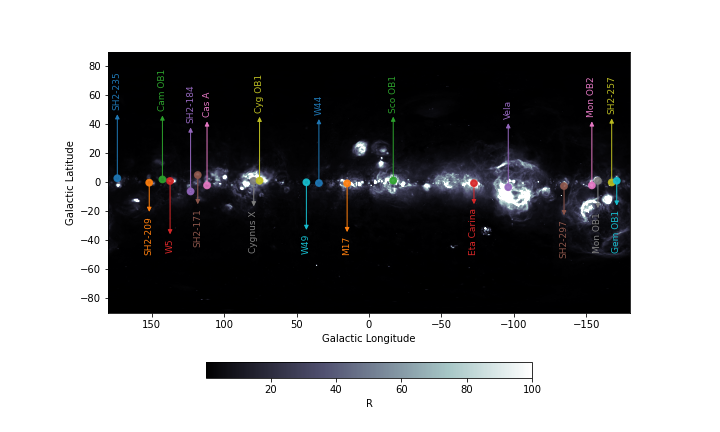

In [12]:
plt.figure(figsize=(10, 6))
im = plt.imshow(tmap, extent=[-180, 180, -90, 90], origin='lower', cmap= 'bone', vmin=0.1, vmax=100)
cbar = plt.colorbar(im, orientation = 'horizontal', fraction = 0.05)
cbar.set_label(hdulist2[1].header['TUNIT1'])

for n in range(len(l_new)):
    #Circles = plt.Circle((l_new[n], b[n]),2, color = 'C'+ str(n), alpha = 0.7, linewidth = 2, label = df_regiones['Identificador'][n])
    Circles = plt.Circle((l_new[n], b[n]),2, color = 'C'+ str(n), alpha = 0.9, linewidth = 2)
    if n % 2 == 0:
        plt.annotate(df_regiones['Identificador'][n], xy = (l_new[n], b[n]), xytext=(0,70), textcoords = 'offset points', color = 'C'+ str(n), fontsize=9,  rotation=90, ha='center', arrowprops=dict(arrowstyle="<|-", color = 'C'+ str(n)))
    else:
        plt.annotate(df_regiones['Identificador'][n], xy = (l_new[n], b[n]), xytext=(0,-70), textcoords = 'offset points', color = 'C'+ str(n), fontsize=9,  rotation=90, ha='center', arrowprops=dict(arrowstyle="<|-", color = 'C'+ str(n)))
    plt.gca().add_patch(Circles)
    
    
plt.gca().invert_xaxis()
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
#plt.legend(loc='center right', bbox_to_anchor =(1.30,0.4))
plt.savefig('Mapa_Isaias_Halpha.jpg', dpi = 500)

### Mapa de CO

In [13]:
hdulist5 = fits.open('https://lambda.gsfc.nasa.gov/data/foregrounds/dame_CO/lambda_wco_dht2001.fits')

COMMEN    map, W(CO), was obtained from the CfA Millimeter Wave Group website    [astropy.io.fits.card]


In [14]:
hdulist5[1].header['TUNIT1']

'K km s-1'

In [15]:
# Establecer la proyeccion HEALPix

nside_CO = hdulist5[1].header['NSIDE']
order_CO = hdulist5[1].header['ORDERING']
hp_CO = HEALPix(nside=nside_CO, order=order_CO, frame=Galactic())

# Establecer una red de 300x200 para lon/lat
lon_CO = np.linspace(-180., 180., 1300) * u.deg
lat_CO = np.linspace(-90., 90., 1000) * u.deg
lon_grid_CO, lat_grid_CO = np.meshgrid(lon_CO, lat_CO)

# Establecer las coordenadas en astropy
coords_CO = SkyCoord(lon_grid_CO.ravel(), lat_grid_CO.ravel(), frame='galactic')

# Interpolar valores de temperatura en el archivo fits
temperature_CO = hdulist5[1].data['temperature']
tmap_CO = hp_CO.interpolate_bilinear_lonlat(coords_CO.l, coords_CO.b, temperature_CO)
tmap_CO = tmap_CO.reshape((1000, 1300))

<IPython.core.display.Javascript object>


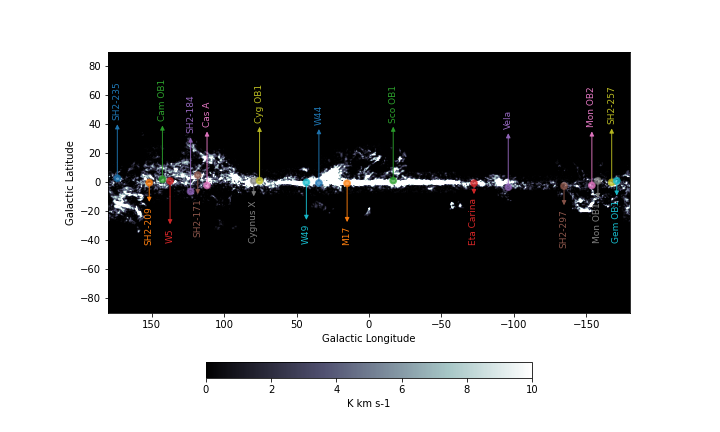

In [16]:
plt.figure(figsize=(10, 6))
im_CO = plt.imshow(tmap_CO, extent=[-180, 180, -90, 90], origin='lower', cmap= 'bone',vmin=0.0, vmax=10)
cbar_CO = plt.colorbar(im_CO, orientation = 'horizontal', fraction = 0.05)
cbar_CO.set_label(hdulist5[1].header['TUNIT1'])

for n in range(len(l_new)):
    #Circles = plt.Circle((l_new[n], b[n]),2, label = df_regiones['Identificador'][n], color = 'C'+ str(n), alpha = 0.7, linewidth = 2)
    Circles = plt.Circle((l_new[n], b[n]),2, color = 'C'+ str(n), alpha = 0.7, linewidth = 2)
    if n % 2 == 0:
        plt.annotate(df_regiones['Identificador'][n], xy = (l_new[n], b[n]), xytext=(0,60), textcoords = 'offset points', color = 'C'+ str(n), fontsize=9,  rotation=90, ha='center', arrowprops=dict(arrowstyle="<|-", color = 'C'+ str(n), alpha = 0.9))
    else:
        plt.annotate(df_regiones['Identificador'][n], xy = (l_new[n], b[n]), xytext=(0,-60), textcoords = 'offset points', color = 'C'+ str(n), fontsize=9,  rotation=90, ha='center', arrowprops=dict(arrowstyle="<|-", color = 'C'+ str(n), alpha = 0.9))
    plt.gca().add_patch(Circles)

plt.gca().invert_xaxis()
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
#plt.legend(loc='center right', bbox_to_anchor =(1.30,0.5))
plt.savefig('Mapa_Isaias_CO.jpg', dpi = 500)